In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np
import os
from mlp_numpy import MLP
from modules import CrossEntropy
from sklearn.datasets import make_moons
from sklearn import utils
import matplotlib.pyplot as plt

In [2]:
# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 10

FLAGS = None

In [3]:
parser = argparse.ArgumentParser()
parser.add_argument('--dnn_hidden_units', type=str, default=DNN_HIDDEN_UNITS_DEFAULT,
                    help='Comma separated list of number of units in each hidden layer')
parser.add_argument('--learning_rate', type=float, default=LEARNING_RATE_DEFAULT,
                    help='Learning rate')
parser.add_argument('--max_steps', type=int, default=MAX_EPOCHS_DEFAULT,
                    help='Number of epochs to run trainer.')
parser.add_argument('--eval_freq', type=int, default=EVAL_FREQ_DEFAULT,
                    help='Frequency of evaluation on the test set')
FLAGS, unparsed = parser.parse_known_args()

In [4]:
def accuracy(predictions, targets):
    """
    Computes the prediction accuracy, i.e., the average of correct predictions
    of the network.
    Args:
        predictions: 2D float array of size [number_of_data_samples, n_classes]
        labels: 2D int array of size [number_of_data_samples, n_classes] with one-hot encoding of ground-truth labels
    Returns:
        accuracy: scalar float, the accuracy of predictions.
    """
    return (np.argmax(predictions, axis=1) == np.argmax(targets, axis=1)).sum() / predictions.shape[0]

In [5]:
X, labels = make_moons(1000, shuffle=True)
n_classes = np.unique(labels).shape[0]
onehot_labels = np.eye(n_classes)[labels]
train_set, train_labels = X[:800], onehot_labels[:800]
test_set, test_labels = X[800:], onehot_labels[800:]

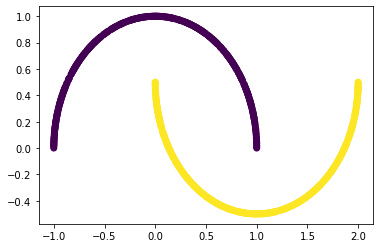

In [6]:
plt.scatter(train_set[:,0], train_set[:,1], c=labels[:800])

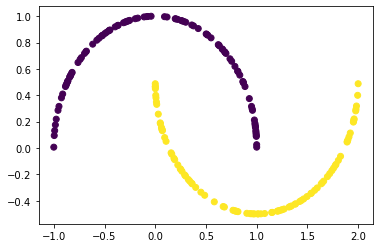

In [7]:
plt.scatter(test_set[:,0], test_set[:,1], c=labels[800:])

In [13]:
def train_SGD(train_x, train_y, test_x, test_y):
    """
    Performs training and evaluation of MLP model.
    NOTE: You should the model on the whole test set each eval_freq iterations.
    """
    # YOUR TRAINING CODE GOES HERE
    train_accs, test_accs, epochs = [], [], []
    n_hidden = [int(hidden) for hidden in FLAGS.dnn_hidden_units.split(',')]
    model = MLP(train_x.shape[1], n_hidden, n_classes, FLAGS.learning_rate)
    loss = CrossEntropy()
    for epoch in range(FLAGS.max_steps):
        train_x, train_y = utils.shuffle(train_x, train_y)
        for i in range(train_x.shape[0]):
            pred = model.forward(np.expand_dims(train_x[i], 0))
            gradient = loss.backward(pred, np.expand_dims(train_y[i], 0))
            model.backward(gradient)
        if epoch > 0 and epoch % FLAGS.eval_freq == 0:
            epochs.append(epoch)
            train_acc = accuracy(model.forward(train_x), train_y)
            train_accs.append(train_acc)
            test_acc = accuracy(model.forward(test_x), test_y)
            test_accs.append(test_acc)
    
    plt.figure(1, figsize=(20, 10))
    plt.plot(epochs, train_accs, 'r', label='Train Acc')
    plt.plot(epochs, test_accs, 'b', label='Test Acc')
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("BGD Training")

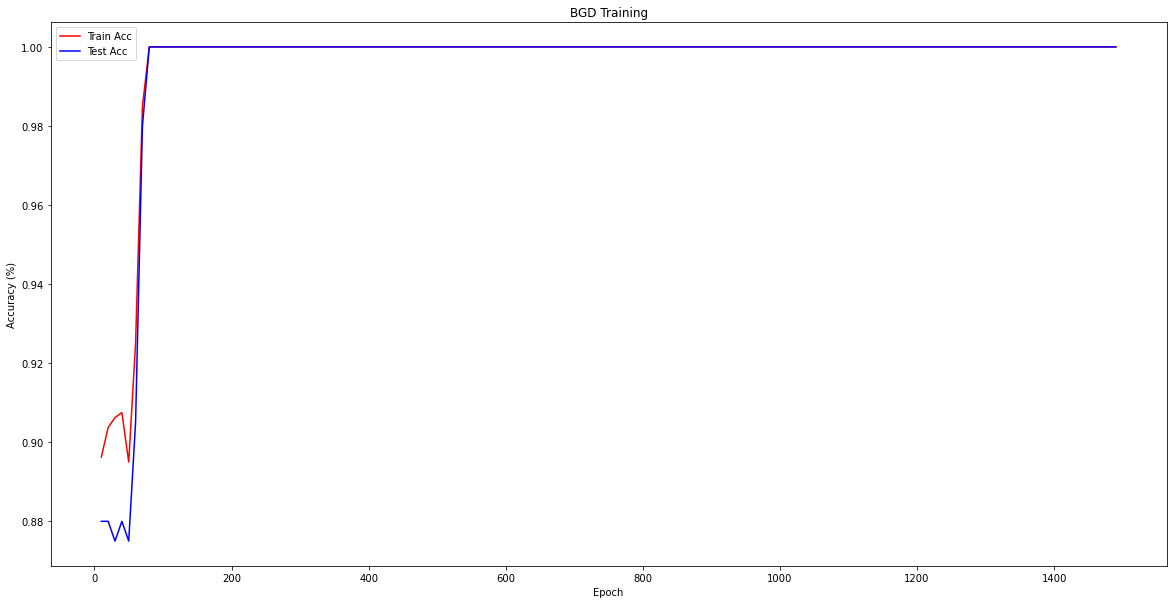

In [14]:
train_SGD(train_set, train_labels, test_set, test_labels)